# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [58]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [59]:
date = np.array('2019-07-18', dtype=np.datetime64) #starting from this date that you set on the program. 
date

array(datetime.date(2019, 7, 18), dtype='datetime64[D]')

In [5]:
#creates 7 concsecutive dates starting from today
date + np.arange(7) #creates 7 days starting from the day you are on.

array(['2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
       '2019-07-22', '2019-07-23', '2019-07-24'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [10]:
#make index using timestamp
index = pd.DatetimeIndex(['2016-02-11', '2016-07-01',
                          '2016-07-09', '2016-10-08',
                        '2017-02-18', '2017-02-25',
                          '2017-05-02', '2017-08-26',
                         '2017-12-15', '2018-02-11'])

data = pd.Series([0,1,2,3,4,5,6,7,8,9], index=index) #a series is a singular column from a dataframe
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

In [11]:
#get rows from 2015
data['2017']

2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [12]:
dates = pd.to_datetime([datetime(2017, 12, 15), '8th of October 2016', '2017-02-25', '2019-Jan-16', '20180211'])
dates

DatetimeIndex(['2017-12-15', '2016-10-08', '2017-02-25', '2019-01-16',
               '2018-02-11'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [13]:
pd.timedelta_range(0, periods=5, freq='1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [17]:
#create days from start date with periods (how many)
from pandas.tseries.offsets import BDay


In [19]:
pd.date_range('2019-07-18', periods=20, freq=BDay())

DatetimeIndex(['2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
               '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [29]:

data = pd.read_csv('datasets/datasets_smalltravel.csv', index_col="Date", parse_dates=True)


In [44]:
data.head()

,Date,GoingTo,Mean,MovingTime
Date,,,,
2012-01-06,Home,78.3,36.3,114.6
2012-01-06,GSK,81.8,34.9,116.7
2012-01-04,Home,82.0,35.9,117.9
2012-01-04,GSK,74.2,35.6,109.8
2012-01-03,Home,83.4,34.8,118.2


In [31]:
data.describe()

,AvgSpeed,MovingTime
count,205.000000,205.000000
mean,74.477561,37.871707
std,11.409816,4.835072
min,38.100000,27.100000
25%,68.900000,35.700000
50%,73.600000,37.600000
75%,79.900000,39.900000
max,107.700000,62.400000


In [43]:
#rename columns with shorter name
#create a new column 'Total' with combined values of west and east columns
data.columns = ['Date', 'GoingTo', 'Mean','MovingTime']

data.head()

,Date,GoingTo,Mean,MovingTime
Date,,,,
2012-01-06,Home,78.3,36.3,114.6
2012-01-06,GSK,81.8,34.9,116.7
2012-01-04,Home,82.0,35.9,117.9
2012-01-04,GSK,74.2,35.6,109.8
2012-01-03,Home,83.4,34.8,118.2


In [51]:
by_weekday

,GoingTo,Mean,MovingTime
Mon,73.197436,38.146154,111.343590
Tue,73.781250,38.427083,112.208333
Wed,72.229787,39.085106,111.314894
Thur,74.365909,37.418182,111.784091
Fri,81.659259,35.114815,116.774074


Text(0,0.5,'Weekly Average Speed')

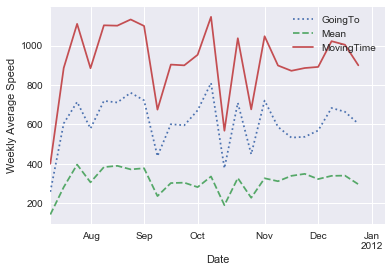

In [57]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Average Speed')

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [53]:
by_weekday

,GoingTo,Mean,MovingTime
Mon,73.197436,38.146154,111.343590
Tue,73.781250,38.427083,112.208333
Wed,72.229787,39.085106,111.314894
Thur,74.365909,37.418182,111.784091
Fri,81.659259,35.114815,116.774074


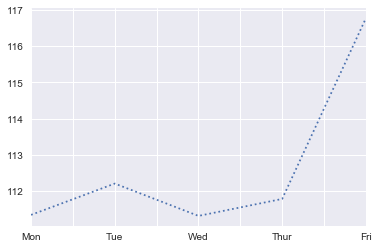

In [55]:

by_weekday = data['MovingTime'].groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
by_weekday.plot(style=[':','--'])

In [50]:
#set conditions to show hourly trend on weekdays vs weekends
weekend = np.where(data.index.weekday < 5, 'Weekday','Moving Time')
by_time = data.groupby([weekend, data.index.time]).mean()
